In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()

In [7]:
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=1)
print(x_train.shape)
print(x_test.shape)

(426, 30)
(143, 30)


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
#Transform data
x_train_scaled=scaler.transform(x_train)
print("Transformed shape: {}".format(x_train_scaled.shape))
print("Per feature min before scaling: \n {}".format(x_train.min(axis=0)))
print("Per feature max before scaling: \n {}".format(x_train.max(axis=0)))
print("Per feature min after scaling: \n {}".format(x_train_scaled.min(axis=0)))
print("Per feature max after scaling: \n {}".format(x_train_scaled.max(axis=0)))

Transformed shape: (426, 30)
Per feature min before scaling: 
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
Per feature max before scaling: 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
Per feature min after scaling: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Per feature max after scaling: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [17]:
import pandas as pd

data_mnist=pd.read_csv('train_digit_recogniser.csv')
data_mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
l=data_mnist['label']
d=data_mnist.drop("label",axis=1)
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


In [19]:
# Pick first 15K data-points to work on for time-effeciency.
#Excercise: Perform the same analysis on all of 42K data-points.
labels=l.head(15000)
data=d.head(15000)
print("the shape of sample data = ", data.shape)

the shape of sample data =  (15000, 784)


In [22]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print("the shape of standardized data = ", standardized_data.shape)

c:\users\sonali\desktop\rucha_official\python\python37\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


the shape of standardized data =  (15000, 784)


c:\users\sonali\desktop\rucha_official\python\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


shape of pca_reduced.shape =  (15000, 2)
   1st_principal  2nd_principal  label
0      -5.043749      -5.559382    1.0
1      19.305245       6.193314    0.0
2      -7.678641      -1.909249    1.0
3      -0.464728       5.526113    4.0
4      26.644267       6.366313    0.0


c:\users\sonali\desktop\rucha_official\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


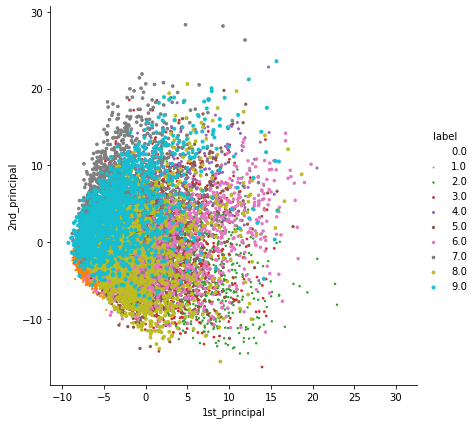

In [27]:
import pandas as pd
import numpy as np
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(standardized_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

# appending label to the 2d projected data
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

import seaborn as sn
import matplotlib.pyplot as plt
sn.FacetGrid(dataframe,hue="label", size=6).map(plt.scatter,'1st_principal','2nd_principal','label').add_legend()
plt.show()

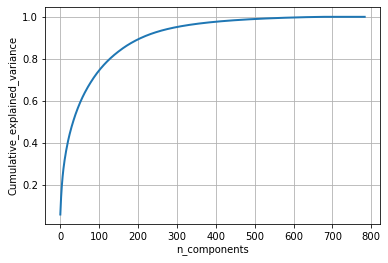

In [32]:
# PCA for dimensionality redcution (non-visualization)
pca.n_components = 784
pca_data = pca.fit_transform(standardized_data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_sum=np.cumsum(percentage_var_explained)

plt.figure(1,figsize=(6,4))

plt.clf()
plt.plot(cum_sum,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


In [34]:
#TSNE

from sklearn.manifold import TSNE

label_1000=labels[0:1000]
data_1000=standardized_data[0:1000,:]

c:\users\sonali\desktop\rucha_official\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


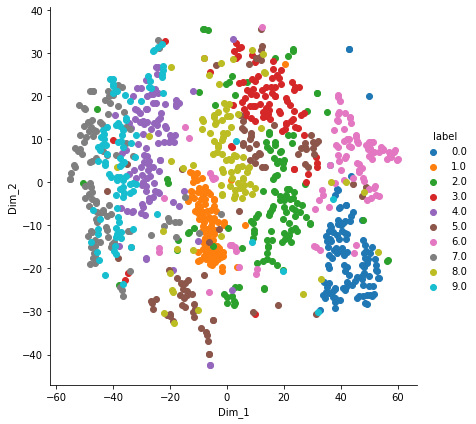

In [36]:
model=TSNE(n_components=2,random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data=model.fit_transform(data_1000)
# creating a new data frame which help us in ploting the result data
tsne_data=np.vstack((tsne_data.T,label_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df,hue='label',size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

c:\users\sonali\desktop\rucha_official\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


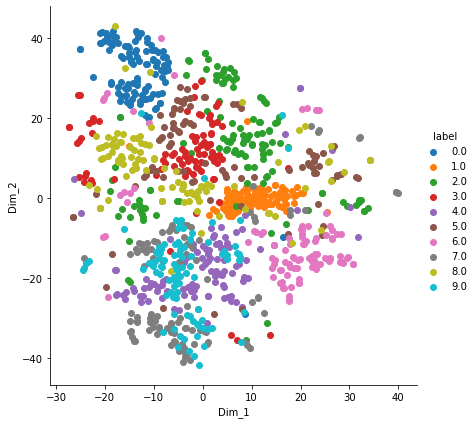

In [37]:
model=TSNE(n_components=2,random_state=0,perplexity=50)

tsne_data=model.fit_transform(data_1000)
# creating a new data frame which help us in ploting the result data
tsne_data=np.vstack((tsne_data.T,label_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df,hue='label',size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

c:\users\sonali\desktop\rucha_official\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


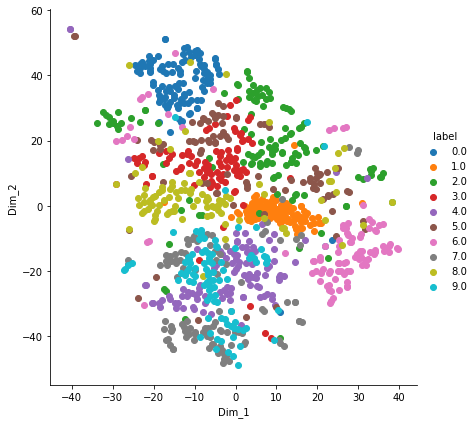

In [38]:
model=TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)

tsne_data=model.fit_transform(data_1000)
# creating a new data frame which help us in ploting the result data
tsne_data=np.vstack((tsne_data.T,label_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df,hue='label',size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

c:\users\sonali\desktop\rucha_official\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


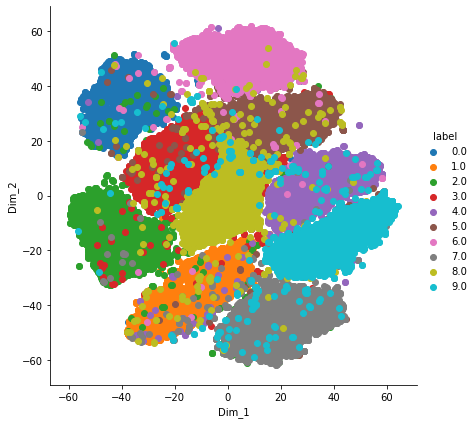

In [39]:
l_full=data_mnist['label']
d_full=data_mnist.drop("label",axis=1)

model=TSNE(n_components=2,random_state=0)

tsne_data=model.fit_transform(d_full)
# creating a new data frame which help us in ploting the result data
tsne_data=np.vstack((tsne_data.T,l_full)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df,hue='label',size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()